# Time series Analysis

In [1]:
import pandas as pd

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\un\Desktop\Case Study\Data_set2.csv")
print(df)

          date   price  production  exchange_rate  fuel_price  \
0     1/1/2000   26.94    1781.200         73.150        13.2   
1     2/1/2000   25.00    1781.200         73.475        16.2   
2     3/1/2000   23.09    1781.200         73.750        16.2   
3     4/1/2000   22.13    1781.200         74.300        16.2   
4     5/1/2000   21.71    1077.600         74.735        16.2   
..         ...     ...         ...            ...         ...   
271   8/1/2022  239.24    1461.675        357.880       430.0   
272   9/1/2022  228.44    1461.675        365.500       430.0   
273  10/1/2022  224.78    1931.200        363.000       430.0   
274  11/1/2022  222.28    1931.200        368.500       430.0   
275  12/1/2022  218.20    1931.200        367.500       420.0   

    Poduction Cost (Rs/Hr) Tax rate  
0                   12,500      15%  
1                   13,200      15%  
2                   14,000      15%  
3                   11,500      15%  
4                   12,000   

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.head()

,date,price,production,exchange_rate,fuel_price,Poduction Cost (Rs/Hr),Tax rate
0,1/1/2000,26.94,1781.2,73.150,13.2,"12,500",15%
1,2/1/2000,25.00,1781.2,73.475,16.2,"13,200",15%
2,3/1/2000,23.09,1781.2,73.750,16.2,"14,000",15%
3,4/1/2000,22.13,1781.2,74.300,16.2,"11,500",15%
4,5/1/2000,21.71,1077.6,74.735,16.2,"12,000",15%


In [18]:
df = pd.DataFrame({ 'new_date': df['date'],'new_price': df['price']})
print(new_data)

      new_date  new_price
0     1/1/2000      26.94
1     2/1/2000      25.00
2     3/1/2000      23.09
3     4/1/2000      22.13
4     5/1/2000      21.71
..         ...        ...
271   8/1/2022     239.24
272   9/1/2022     228.44
273  10/1/2022     224.78
274  11/1/2022     222.28
275  12/1/2022     218.20

[276 rows x 2 columns]


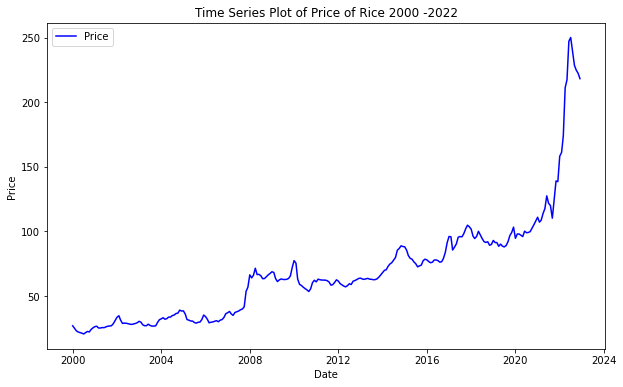

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'date' column is not already in datetime format
df['new_date'] = pd.to_datetime(df['new_date'])

# Sort the DataFrame by date if it's not already sorted
df = df.sort_values('new_date')

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df['new_date'], df['new_price'], label='Price', color='blue')
plt.title('Time Series Plot of Price of Rice 2000 -2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


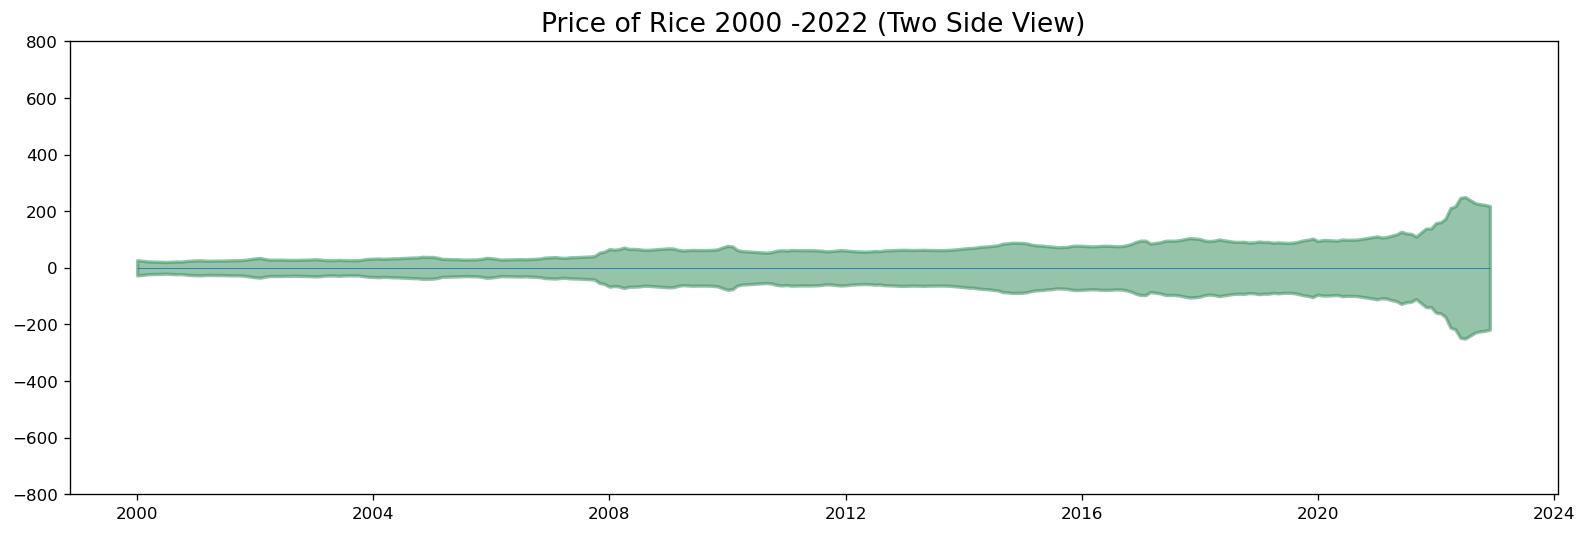

In [31]:
x = df['new_date'].values
y1 = df['new_price'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Price of Rice 2000 -2022 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['new_date']), xmax=np.max(df['new_date']), linewidth=.5)
plt.show()

In [ ]:
#It can be seen that its a monthly time series and follows a certain repetitive pattern every year. So, we can plot each year as a separate line in the same plot. This let us compare the year wise patterns side-by-side.

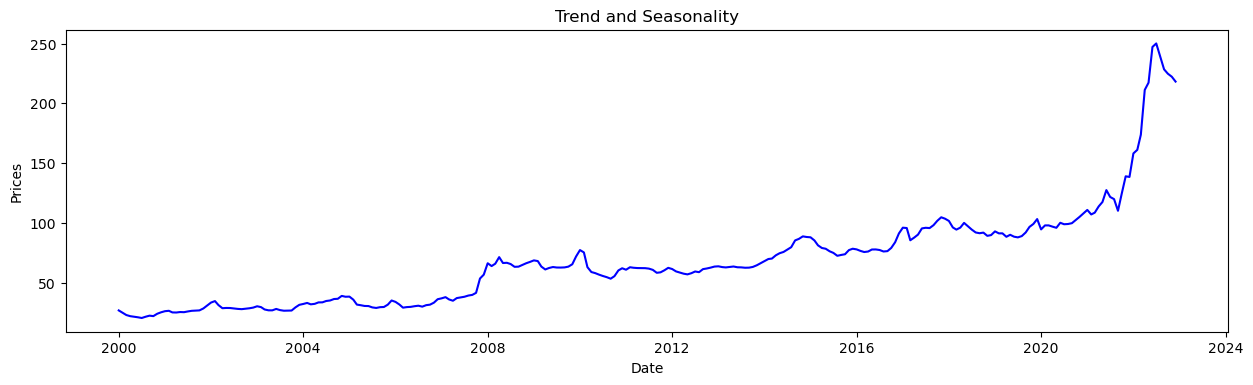

In [34]:
#Seasonality
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Prices', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['new_date'], y=df['new_price'], title='Trend and Seasonality')

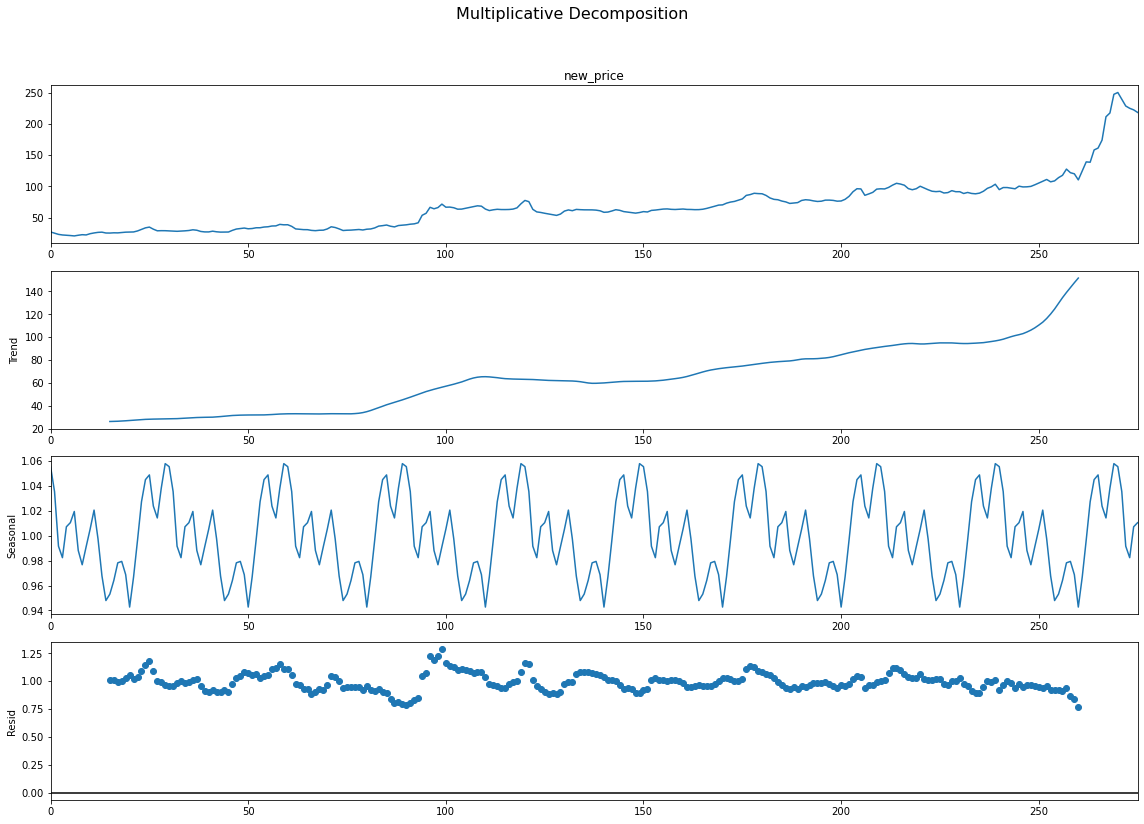

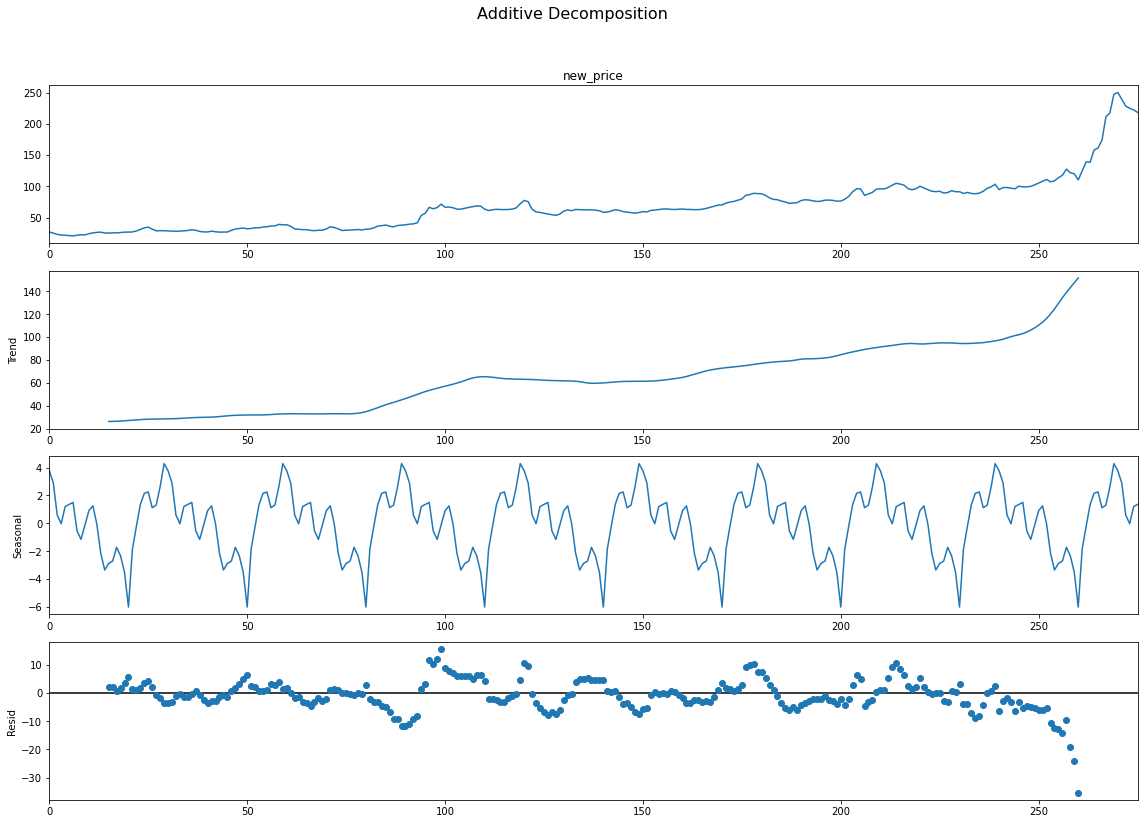

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['new_price'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['new_price'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Text(0.5, 1.0, 'Price detrended by subtracting the least squares fit')

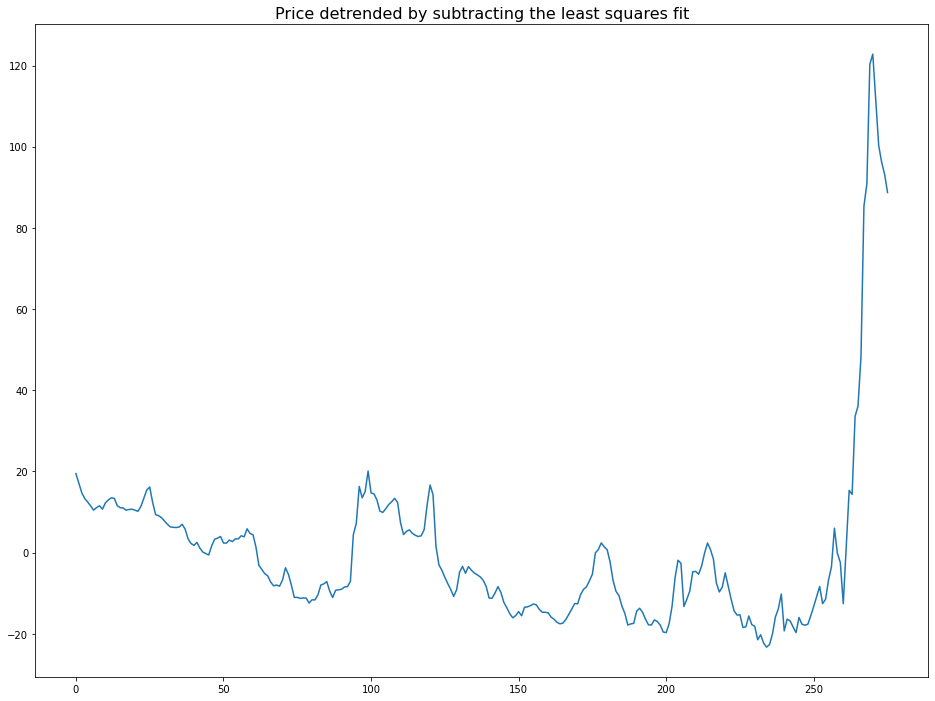

In [36]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['new_price'].values)
plt.plot(detrended)
plt.title('Price detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Price detrended by subtracting the trend component')

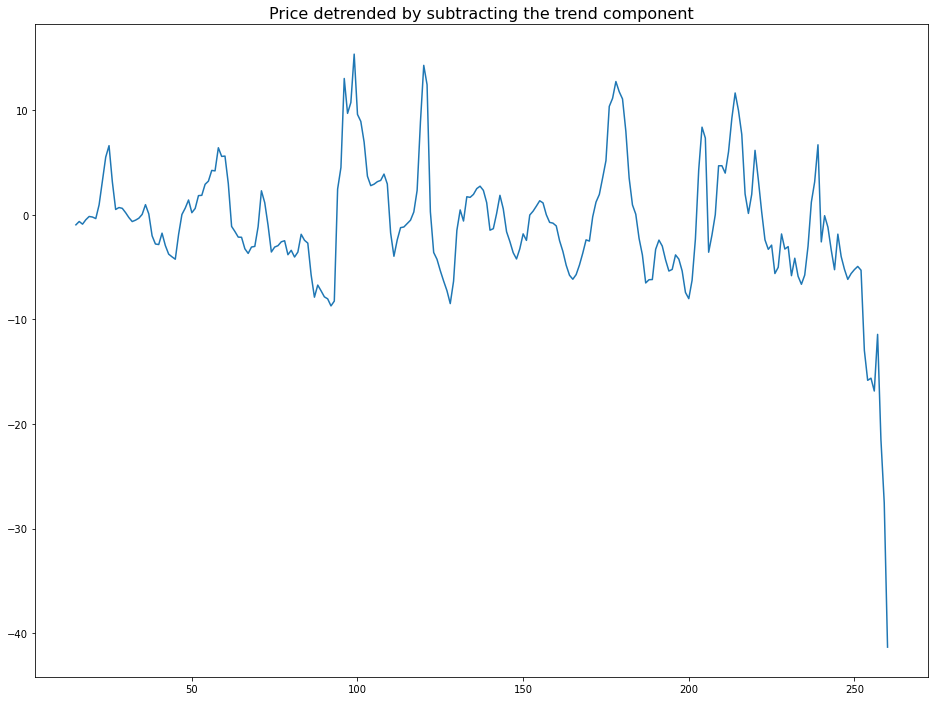

In [38]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['new_price'], model='multiplicative', period=30)
detrended = df['new_price'].values - result_mul.trend
plt.plot(detrended)
plt.title('Price detrended by subtracting the trend component', fontsize=16)

[]

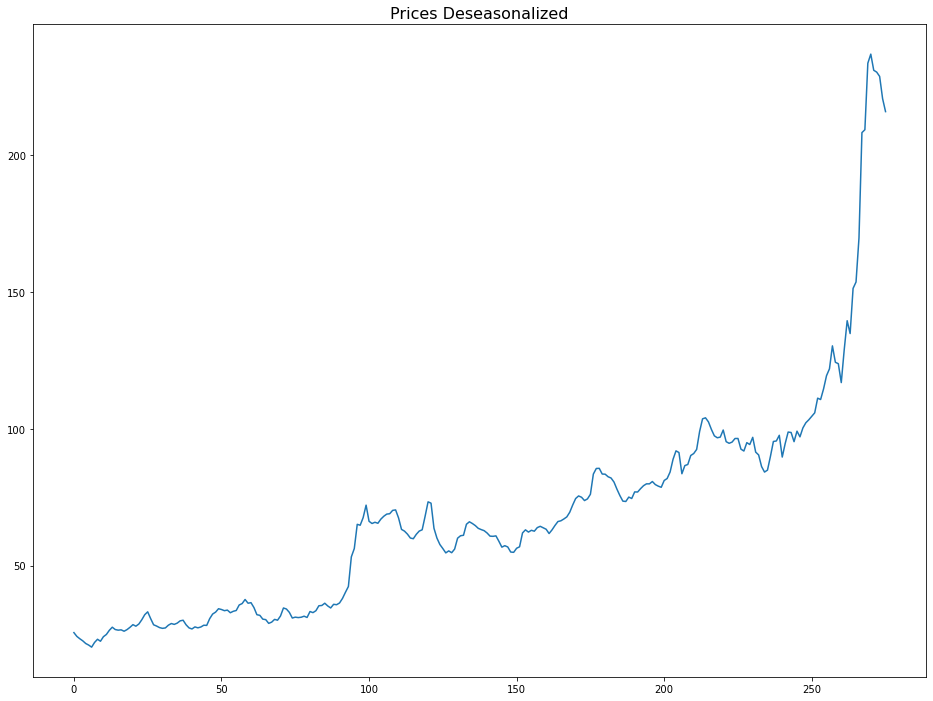

In [40]:
# Subtracting the Trend Component

# Time Series Decomposition
result_mul = seasonal_decompose(df['new_price'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['new_price'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Prices Deseasonalized', fontsize=16)
plt.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

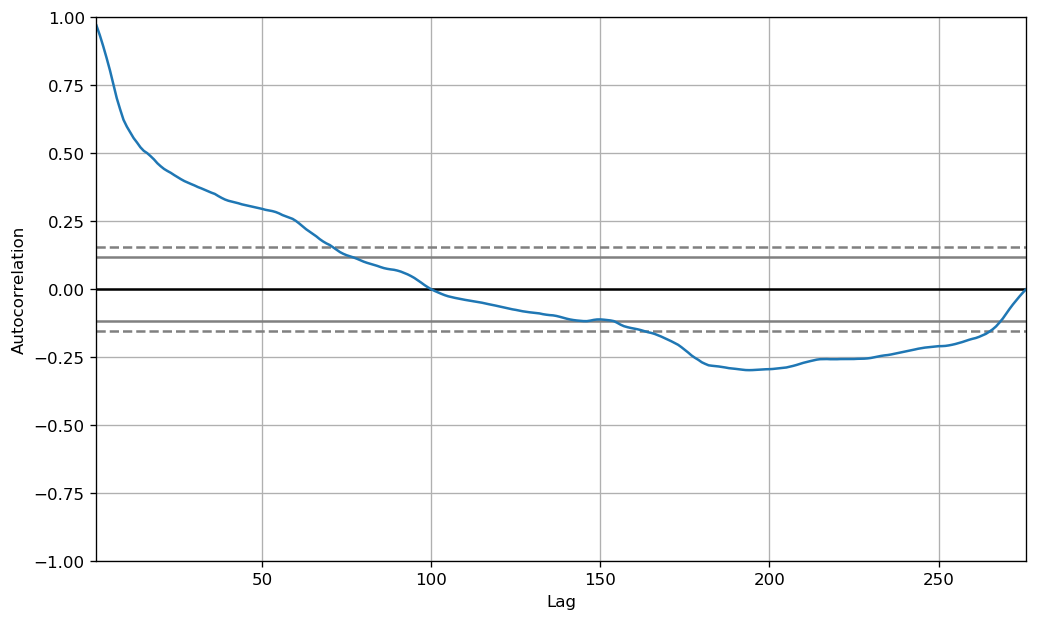

In [41]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['new_price'].tolist())

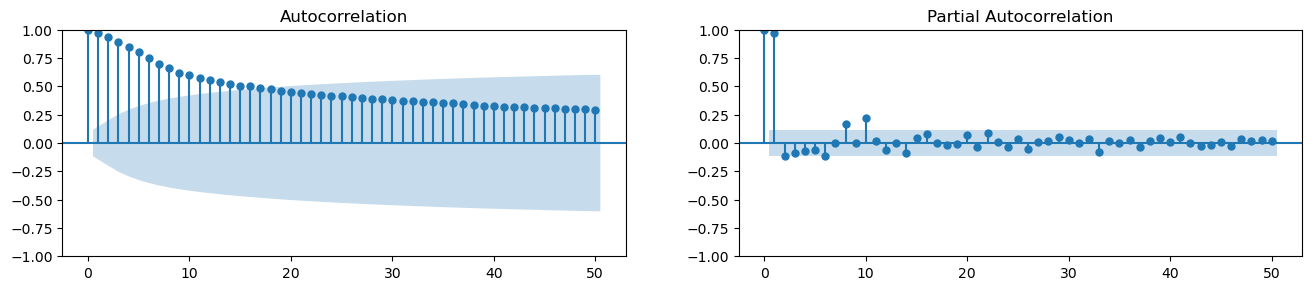

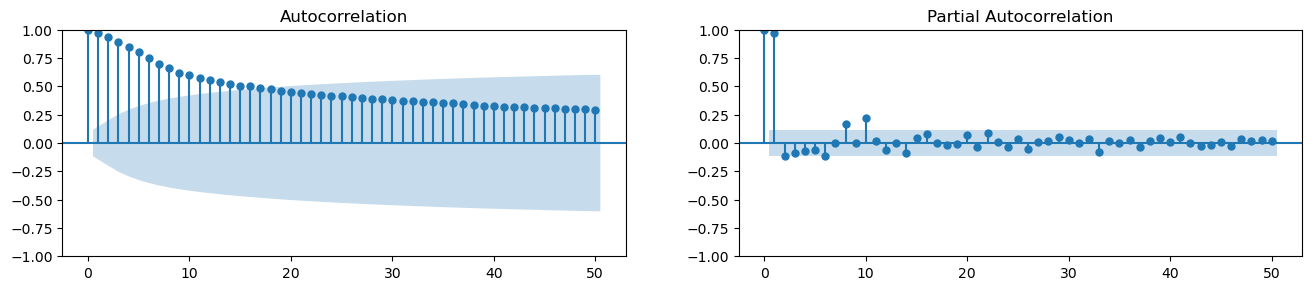

In [43]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['new_price'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['new_price'].tolist(), lags=50, ax=axes[1])

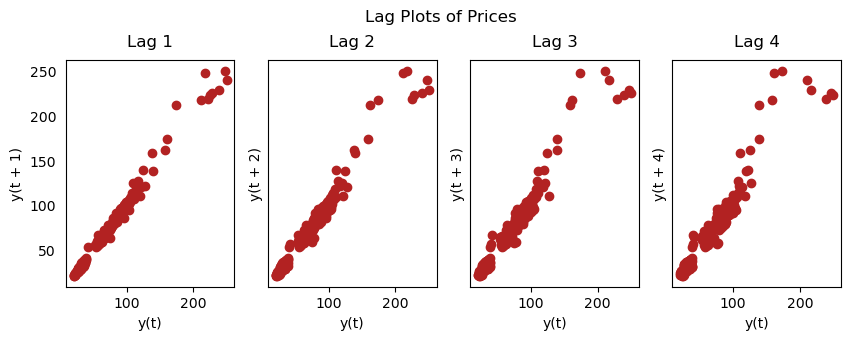

In [44]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['new_price'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Prices', y=1.05)    
plt.show()

In [51]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming 'date' column is not already in datetime format
df['new_date'] = pd.to_datetime(df['new_date'])

# Sort the DataFrame by date if it's not already sorted
df = df.sort_values('new_date')

# Perform Granger causality test
max_lag = 5  # You can adjust the lag parameter as needed
test_result = grangercausalitytests(df[['new_price', 'new_date']], max_lag, verbose=True)

# Display the test results
for lag in range(1, max_lag + 1):
    p_value = test_result[lag][0]['ssr_ftest'][1]
    print(f'Lag {lag}: p-value = {p_value}')

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df['new_date'], df['new_price'], label='Price', color='blue')
plt.plot(df['new_date'], df['some_other_variable'], label='Some Other Variable', color='green')
plt.title('Time Series Plot with Granger Causality Test')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'